In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Creating data set

a =[0, 0, 1, 1, 0, 0,
   0, 1, 0, 0, 1, 0,
   1, 1, 1, 1, 1, 1,
   1, 0, 0, 0, 0, 1,
   1, 0, 0, 0, 0, 1]

b =[0, 1, 1, 1, 0, 0,
   0, 1, 0, 0, 1, 0,
   0, 1, 1, 1, 0, 0,
   0, 1, 0, 0, 1, 0,
   0, 1, 1, 1, 0, 0]

c =[0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 1, 1, 1, 0]

# Creating labels
y =[[1, 0, 0],
   [0, 1, 0],
   [0, 0, 1]]

In [3]:
# converting data and labels into numpy array
x =[np.array(a).reshape(1, 30), np.array(b).reshape(1, 30), np.array(c).reshape(1, 30)]
y = np.array(y)

In [4]:
# activation function
def sigmoid(x):
	return(1/(1 + np.exp(-x)))

# Creating the Feed forward neural network
def f_forward(x, w1, w2):
	# hidden
	z1 = x.dot(w1)
	a1 = sigmoid(z1)
	z2 = a1.dot(w2)
	a2 = sigmoid(z2)
	return(a2)

# initializing the weights randomly
def generate_wt(x, y):
	li =[]
	for i in range(x * y):
		li.append(np.random.randn())
	return(np.array(li).reshape(x, y))
	
# for loss we will be using mean square error(MSE)
def loss(out, Y):
	s =(np.square(out-Y))
	s = np.sum(s)/len(y)
	return(s)

# Back propagation of error 
def back_prop(x, y, w1, w2, alpha):
	
	# hidden layer
	z1 = x.dot(w1)
	a1 = sigmoid(z1) 
	z2 = a1.dot(w2)
	a2 = sigmoid(z2)
	
	# error in output layer
	d2 =(a2-y)
	d1 = np.multiply((w2.dot((d2.transpose()))).transpose(), 
								(np.multiply(a1, 1-a1)))
	# Gradient for w1 and w2
	w1_adj = x.transpose().dot(d1)
	w2_adj = a1.transpose().dot(d2)
	
	# Updating parameters
	w1 = w1-(alpha*(w1_adj))
	w2 = w2-(alpha*(w2_adj))
	
	return(w1, w2)

In [5]:
w1 = generate_wt(30, 5)
w2 = generate_wt(5, 3)

print(w1, "\n\n", w2)

[[-1.95866262  1.01696967  0.79225529 -0.00951137 -1.05393408]
 [ 0.06456896  0.13200095  1.81741321 -2.04453761  1.83763396]
 [ 0.41718747 -1.21268074  0.22433917  0.41871462 -0.23744345]
 [-0.84064117 -0.87094717 -0.37032065  0.47856248 -1.51903124]
 [-0.37134814 -3.04990925 -0.50612222  2.21253723 -0.55706855]
 [-0.1472584  -0.32351303 -0.62839752 -2.16743501 -0.41610342]
 [ 1.31526393 -1.45867577  0.7646149  -0.02927058 -0.02388614]
 [ 1.34842475  0.12231827  0.43141895 -0.36769058 -0.16383604]
 [ 0.08592996 -0.62464404 -0.46984736  0.16853616 -2.28972402]
 [ 1.46003124 -1.77687585 -0.75008475  0.17182982 -0.74285586]
 [ 0.53012747 -0.24972521 -0.14745103 -0.49264597 -1.01558132]
 [ 0.1258885  -0.45901242 -1.34298419  0.20047958  1.47962469]
 [-0.61710654  0.51660471 -0.03568382 -2.88914624  1.10239409]
 [ 0.33960062  0.43012078 -0.5426308  -1.44367477 -1.80912793]
 [-0.12403788 -0.73307344  0.05432705  2.56513786  0.47829609]
 [ 0.41048283 -0.46245982  0.82057052  1.77432552  0.92

In [6]:
def train(x, Y, w1, w2, alpha = 0.01, epoch = 10):
	acc =[]
	losses =[]
	for j in range(epoch):
		l =[]
		for i in range(len(x)):
			out = f_forward(x[i], w1, w2)
			l.append((loss(out, Y[i])))
			w1, w2 = back_prop(x[i], y[i], w1, w2, alpha)
		print("epochs:", j + 1, "======== acc:", (1-(sum(l)/len(x)))*100) 
		acc.append((1-(sum(l)/len(x)))*100)
		losses.append(sum(l)/len(x))
	return(acc, losses, w1, w2)

acc, losses, w1, w2 = train(x, y, w1, w2, 0.1, 100)

epochs: 1 ======== acc: 71.19176243035739
epochs: 2 ======== acc: 73.10205276968979
epochs: 3 ======== acc: 74.63032901565703
epochs: 4 ======== acc: 75.95814038216437
epochs: 5 ======== acc: 77.21505572418339
epochs: 6 ======== acc: 78.46136293598398
epochs: 7 ======== acc: 79.67607746301233
epochs: 8 ======== acc: 80.79901241569469
epochs: 9 ======== acc: 81.79531986755157
epochs: 10 ======== acc: 82.66715665767471
epochs: 11 ======== acc: 83.4320721666096
epochs: 12 ======== acc: 84.10858331810516
epochs: 13 ======== acc: 84.71227371665034
epochs: 14 ======== acc: 85.25575289517401
epochs: 15 ======== acc: 85.7492644410452
epochs: 16 ======== acc: 86.20118031605595
epochs: 17 ======== acc: 86.61834484935154
epochs: 18 ======== acc: 87.00633583299306
epochs: 19 ======== acc: 87.36968304337849
epochs: 20 ======== acc: 87.7120574296665
epochs: 21 ======== acc: 88.03643340030276
epochs: 22 ======== acc: 88.34522497164137
epochs: 23 ======== acc: 88.64039763782195
epochs: 24 ======== acc

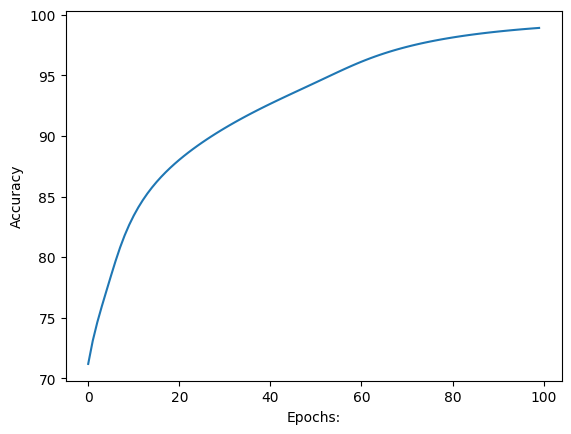

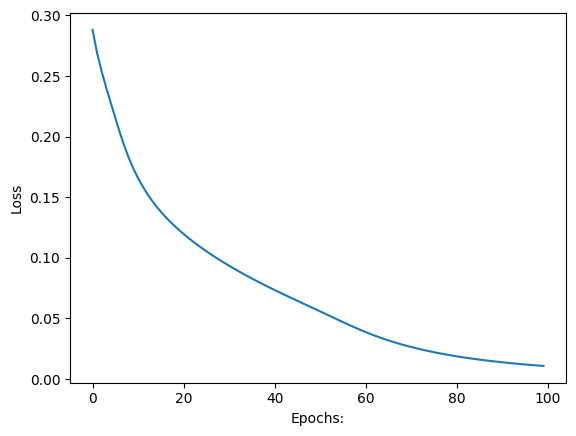

In [7]:
# plotting accuracy
plt.plot(acc)
plt.ylabel('Accuracy')
plt.xlabel("Epochs:")
plt.show()

# plotting Loss
plt.plot(losses)
plt.ylabel('Loss')
plt.xlabel("Epochs:")
plt.show()

Image is of letter C.


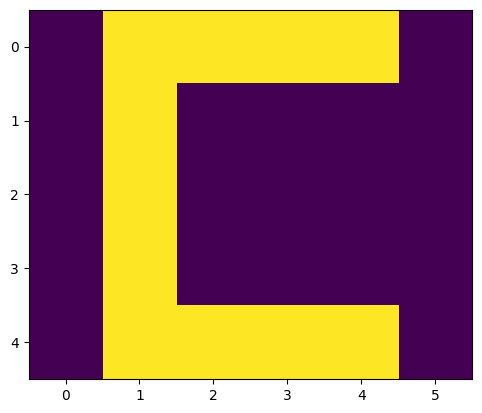

In [13]:
def predict(x, w1, w2):
	Out = f_forward(x, w1, w2)
	maxm = 0
	k = 0
	for i in range(len(Out[0])):
		if(maxm<Out[0][i]):
			maxm = Out[0][i]
			k = i
	if(k == 0):
		print("Image is of letter A.")
	elif(k == 1):
		print("Image is of letter B.")
	else:
		print("Image is of letter C.")
	plt.imshow(x.reshape(5, 6))
	plt.show() 
# Example: Predicting for letter
letter =  2 #0,1,2


predict(x[letter], w1, w2)